In [ ]:
#Programmcode für den Projektentwurf für das Modul T3ELF3804.4
#Autor: Selina Domes
#template: https://github.com/schutera/DeepDive.git Zuletzt am gerufen am 02-01-2024 
# und: https://michaelkipp.de/deeplearning/Optimierungsmethoden.html Zuletzt am gerufen am 03-01-2024 

In [1]:
# Used libraries
import numpy as np
print('Numpy version:', np.__version__)
import matplotlib.pyplot as plt
import seaborn as sn
print('Seaborn version:', sn.__version__)
import pandas as pd
print('Pandas version:', pd.__version__)

import os
import time
import math

import tensorflow as tf        
print('Tensorflow version:', tf.__version__)

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


Numpy version: 1.24.3
Seaborn version: 0.12.2
Pandas version: 2.0.3

Tensorflow version: 2.15.0


In [2]:
from tensorflow.keras.datasets import mnist

# Loading MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Printing the shape
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)


x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [3]:
# Normilize the data - Interval [0,1], lineariesieren
x_train = x_train/255.0
x_test = x_test/255.0

# Printing the shape
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)


x_train: (60000, 28, 28)
x_test: (10000, 28, 28)


In [4]:
from tensorflow.keras.utils import to_categorical

# One-hot encode - every images have an array with size of 10
y_train_OH = to_categorical(y_train, 10)
y_test_OH = to_categorical(y_test, 10)
print("y_train: ", y_train_OH.shape)
print("y_test: ", y_test_OH.shape)

y_train:  (60000, 10)
y_test:  (10000, 10)



 Plot of the first 25 samples in the MNIST training set


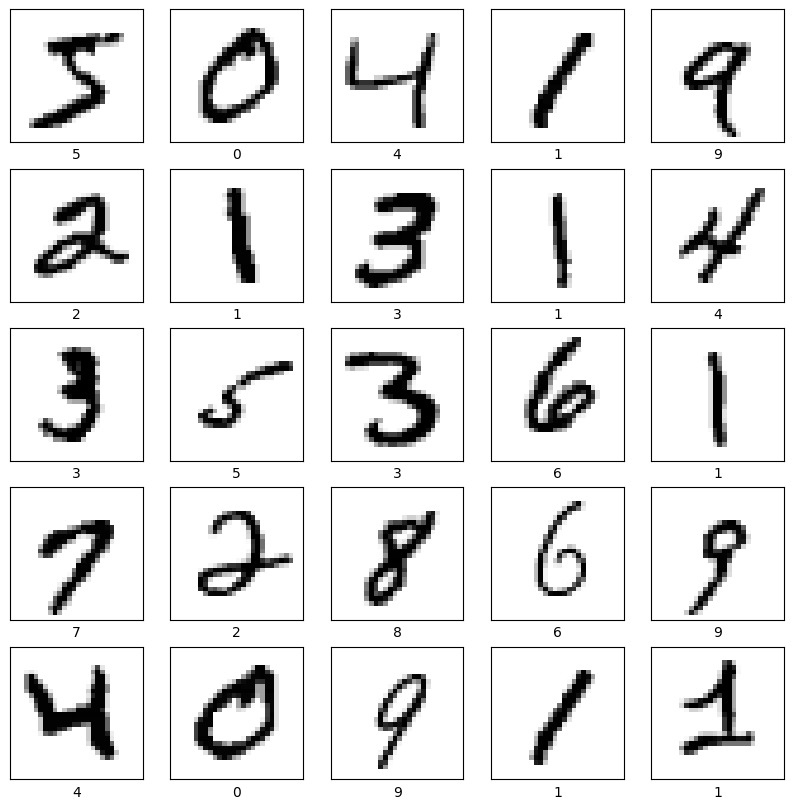

In [6]:
# Plotting data samples
print('\n Plot of the first 25 samples in the MNIST training set')
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

Im nächsten Schritt wird das Neurale Netz definert. Dabei gibt es verschiedene Methoden, das Netz aufzubauen, sowie die Parameter für die Neuronen und deren Interaktion zu setzen. 

Bisher wurde der Aufbau vom Notebook von Hr. Schhutera verwendet und um eine One-Hot-Encoder erweitert, damit für jedes mögliche Label eine seperaten Dimenson dargestellt wird und es möglich ist somit für die Wahrscheinlichkeit für 
jede Ziffer ausgegeben werden kann.

Damit die beste Mögliche Genauigkeit bei der geringesten Epoche und Batch Size erreicht werden kann 





In [14]:
# defintion of two different Architekture

def create_model_1():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(10, activation='softmax')
    ])
    return model

def create_model_2():
    model = models.Sequential([
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(10, activation='softmax')
    ])
    return model


In [15]:
# Define static values
EPOCHS = 30
BATCHSIZE = 100
optimizers = ['SGD', 'Adagrad', 'Adadelta', 'RMSprop', 'Adam', 'Nadam']
models_to_train = [(create_model_1, "Model 1"), (create_model_2, "Model 2")]



Epoch 1/30


600/600 [==============================] - 4s 5ms/step - loss: 1.1049 - accuracy: 0.7066 - val_loss: 0.5845 - val_accuracy: 0.8622
Epoch 2/30
600/600 [==============================] - 2s 4ms/step - loss: 0.5719 - accuracy: 0.8438 - val_loss: 0.4284 - val_accuracy: 0.8885
Epoch 3/30
600/600 [==============================] - 2s 4ms/step - loss: 0.4650 - accuracy: 0.8698 - val_loss: 0.3680 - val_accuracy: 0.9010
Epoch 4/30
600/600 [==============================] - 3s 4ms/step - loss: 0.4152 - accuracy: 0.8810 - val_loss: 0.3346 - val_accuracy: 0.9089
Epoch 5/30
600/600 [==============================] - 2s 4ms/step - loss: 0.3800 - accuracy: 0.8926 - val_loss: 0.3114 - val_accuracy: 0.9137
Epoch 6/30
600/600 [==============================] - 2s 4ms/step - loss: 0.3575 - accuracy: 0.8996 - val_loss: 0.2935 - val_accuracy: 0.9182
Epoch 7/30
600/600 [==============================] - 2s 4ms/step - loss: 0.3381 - accuracy: 0.9051 - val_loss: 0.2793 - val_accuracy: 0.9216
Ep

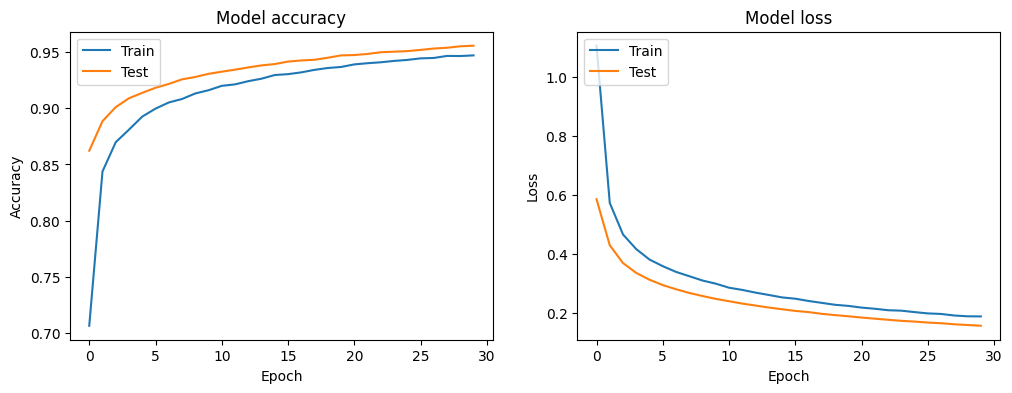

Epoch 1/30
600/600 [==============================] - 3s 4ms/step - loss: 1.7205 - accuracy: 0.5269 - val_loss: 1.2332 - val_accuracy: 0.7579
Epoch 2/30
600/600 [==============================] - 2s 4ms/step - loss: 1.0857 - accuracy: 0.7448 - val_loss: 0.8503 - val_accuracy: 0.8238
Epoch 3/30
600/600 [==============================] - 2s 4ms/step - loss: 0.8440 - accuracy: 0.7906 - val_loss: 0.6874 - val_accuracy: 0.8493
Epoch 4/30
600/600 [==============================] - 2s 3ms/step - loss: 0.7219 - accuracy: 0.8144 - val_loss: 0.5980 - val_accuracy: 0.8640
Epoch 5/30
600/600 [==============================] - 2s 4ms/step - loss: 0.6507 - accuracy: 0.8290 - val_loss: 0.5418 - val_accuracy: 0.8722
Epoch 6/30
600/600 [==============================] - 2s 4ms/step - loss: 0.6022 - accuracy: 0.8386 - val_loss: 0.5021 - val_accuracy: 0.8798
Epoch 7/30
600/600 [==============================] - 3s 4ms/step - loss: 0.5659 - accuracy: 0.8486 - val_loss: 0.4732 - val_accuracy: 0.8853
Epoch 

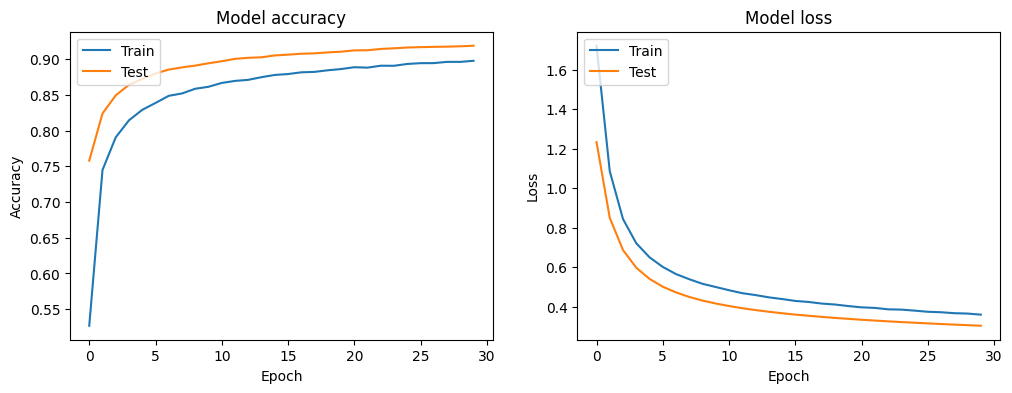

Epoch 1/30
600/600 [==============================] - 3s 4ms/step - loss: 2.3018 - accuracy: 0.1399 - val_loss: 2.2363 - val_accuracy: 0.1868
Epoch 2/30
600/600 [==============================] - 2s 4ms/step - loss: 2.2192 - accuracy: 0.1904 - val_loss: 2.1540 - val_accuracy: 0.2510
Epoch 3/30
600/600 [==============================] - 3s 4ms/step - loss: 2.1402 - accuracy: 0.2460 - val_loss: 2.0750 - val_accuracy: 0.3228
Epoch 4/30
600/600 [==============================] - 3s 4ms/step - loss: 2.0646 - accuracy: 0.3082 - val_loss: 1.9987 - val_accuracy: 0.4089
Epoch 5/30
600/600 [==============================] - 3s 4ms/step - loss: 1.9917 - accuracy: 0.3686 - val_loss: 1.9248 - val_accuracy: 0.4864
Epoch 6/30
600/600 [==============================] - 3s 4ms/step - loss: 1.9210 - accuracy: 0.4308 - val_loss: 1.8528 - val_accuracy: 0.5533
Epoch 7/30
600/600 [==============================] - 2s 4ms/step - loss: 1.8528 - accuracy: 0.4857 - val_loss: 1.7823 - val_accuracy: 0.6056
Epoch 

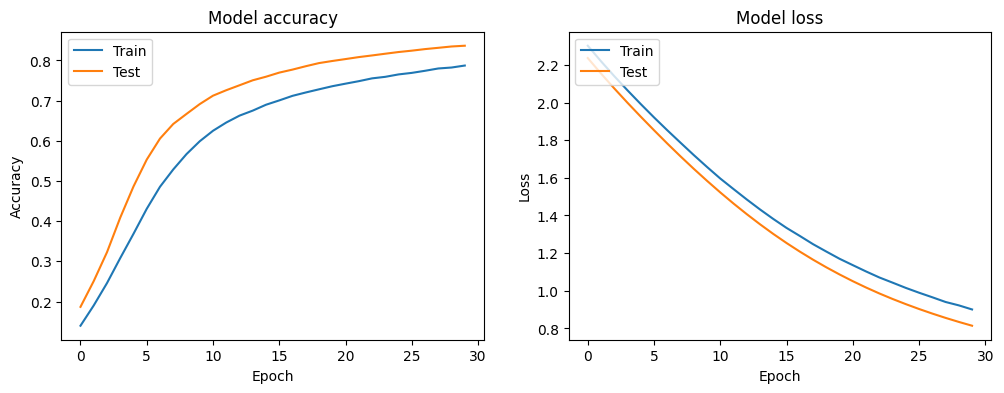

Epoch 1/30
600/600 [==============================] - 3s 4ms/step - loss: 0.3544 - accuracy: 0.8989 - val_loss: 0.1735 - val_accuracy: 0.9483
Epoch 2/30
600/600 [==============================] - 2s 3ms/step - loss: 0.1771 - accuracy: 0.9485 - val_loss: 0.1197 - val_accuracy: 0.9629
Epoch 3/30
600/600 [==============================] - 2s 4ms/step - loss: 0.1347 - accuracy: 0.9600 - val_loss: 0.1041 - val_accuracy: 0.9693
Epoch 4/30
600/600 [==============================] - 2s 4ms/step - loss: 0.1134 - accuracy: 0.9668 - val_loss: 0.0904 - val_accuracy: 0.9728
Epoch 5/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0956 - accuracy: 0.9714 - val_loss: 0.0838 - val_accuracy: 0.9755
Epoch 6/30
600/600 [==============================] - 2s 4ms/step - loss: 0.0851 - accuracy: 0.9743 - val_loss: 0.0783 - val_accuracy: 0.9754
Epoch 7/30
600/600 [==============================] - 2s 4ms/step - loss: 0.0766 - accuracy: 0.9762 - val_loss: 0.0790 - val_accuracy: 0.9757
Epoch 

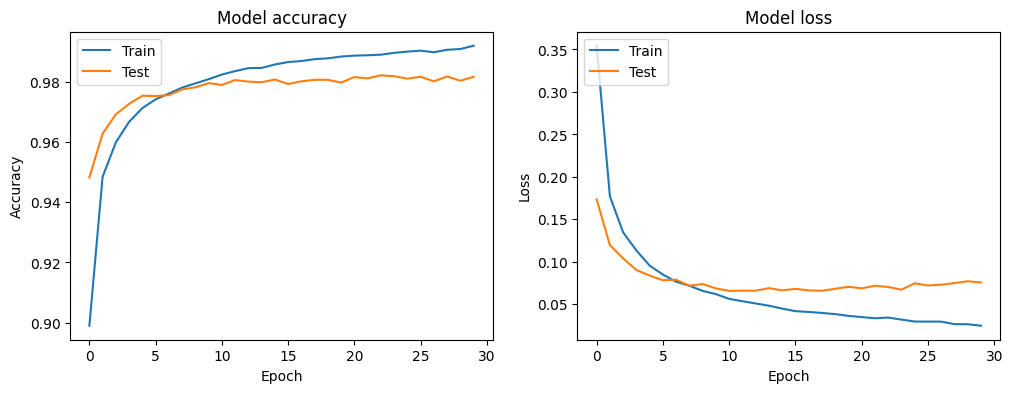

Epoch 1/30
600/600 [==============================] - 3s 4ms/step - loss: 0.3770 - accuracy: 0.8925 - val_loss: 0.1816 - val_accuracy: 0.9474
Epoch 2/30
600/600 [==============================] - 2s 3ms/step - loss: 0.1804 - accuracy: 0.9480 - val_loss: 0.1286 - val_accuracy: 0.9615
Epoch 3/30
600/600 [==============================] - 2s 3ms/step - loss: 0.1356 - accuracy: 0.9604 - val_loss: 0.1015 - val_accuracy: 0.9710
Epoch 4/30
600/600 [==============================] - 2s 4ms/step - loss: 0.1111 - accuracy: 0.9674 - val_loss: 0.0916 - val_accuracy: 0.9717
Epoch 5/30
600/600 [==============================] - 2s 4ms/step - loss: 0.0931 - accuracy: 0.9719 - val_loss: 0.0826 - val_accuracy: 0.9750
Epoch 6/30
600/600 [==============================] - 2s 4ms/step - loss: 0.0810 - accuracy: 0.9759 - val_loss: 0.0769 - val_accuracy: 0.9752
Epoch 7/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0718 - accuracy: 0.9780 - val_loss: 0.0731 - val_accuracy: 0.9768
Epoch 

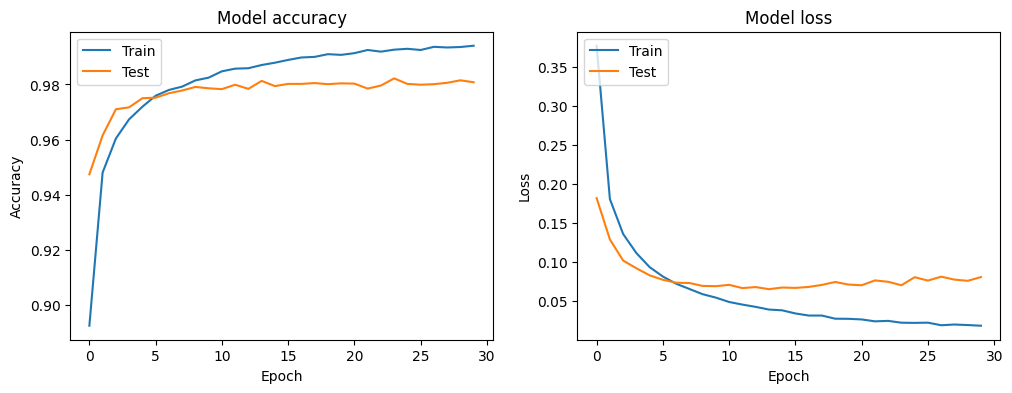

Epoch 1/30
600/600 [==============================] - 4s 5ms/step - loss: 0.3867 - accuracy: 0.8911 - val_loss: 0.1767 - val_accuracy: 0.9499
Epoch 2/30
600/600 [==============================] - 2s 3ms/step - loss: 0.1829 - accuracy: 0.9477 - val_loss: 0.1281 - val_accuracy: 0.9613
Epoch 3/30
600/600 [==============================] - 2s 4ms/step - loss: 0.1349 - accuracy: 0.9602 - val_loss: 0.1075 - val_accuracy: 0.9657
Epoch 4/30
600/600 [==============================] - 2s 3ms/step - loss: 0.1112 - accuracy: 0.9674 - val_loss: 0.0888 - val_accuracy: 0.9731
Epoch 5/30
600/600 [==============================] - 2s 4ms/step - loss: 0.0926 - accuracy: 0.9725 - val_loss: 0.0852 - val_accuracy: 0.9741
Epoch 6/30
600/600 [==============================] - 2s 4ms/step - loss: 0.0824 - accuracy: 0.9750 - val_loss: 0.0752 - val_accuracy: 0.9766
Epoch 7/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0732 - accuracy: 0.9774 - val_loss: 0.0745 - val_accuracy: 0.9775
Epoch 

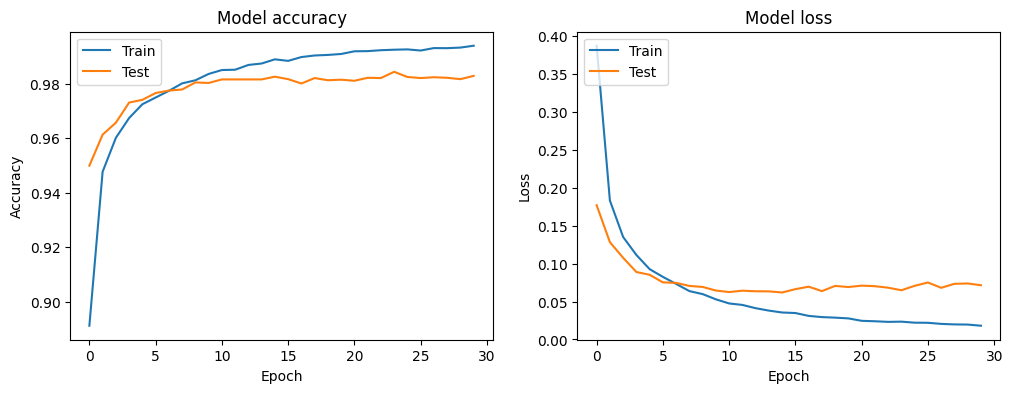


Epoch 1/30
600/600 [==============================] - 9s 14ms/step - loss: 1.1497 - accuracy: 0.6621 - val_loss: 0.3464 - val_accuracy: 0.9002
Epoch 2/30
600/600 [==============================] - 9s 15ms/step - loss: 0.3335 - accuracy: 0.8977 - val_loss: 0.2160 - val_accuracy: 0.9334
Epoch 3/30
600/600 [==============================] - 9s 16ms/step - loss: 0.2412 - accuracy: 0.9264 - val_loss: 0.1584 - val_accuracy: 0.9512
Epoch 4/30
600/600 [==============================] - 9s 15ms/step - loss: 0.1943 - accuracy: 0.9417 - val_loss: 0.1302 - val_accuracy: 0.9628
Epoch 5/30
600/600 [==============================] - 10s 16ms/step - loss: 0.1640 - accuracy: 0.9501 - val_loss: 0.1137 - val_accuracy: 0.9630
Epoch 6/30
600/600 [==============================] - 8s 13ms/step - loss: 0.1441 - accuracy: 0.9569 - val_loss: 0.1003 - val_accuracy: 0.9689
Epoch 7/30
600/600 [==============================] - 9s 15ms/step - loss: 0.1294 - accuracy: 0.9614 - val_loss: 0.0904 - val_accuracy: 0.97

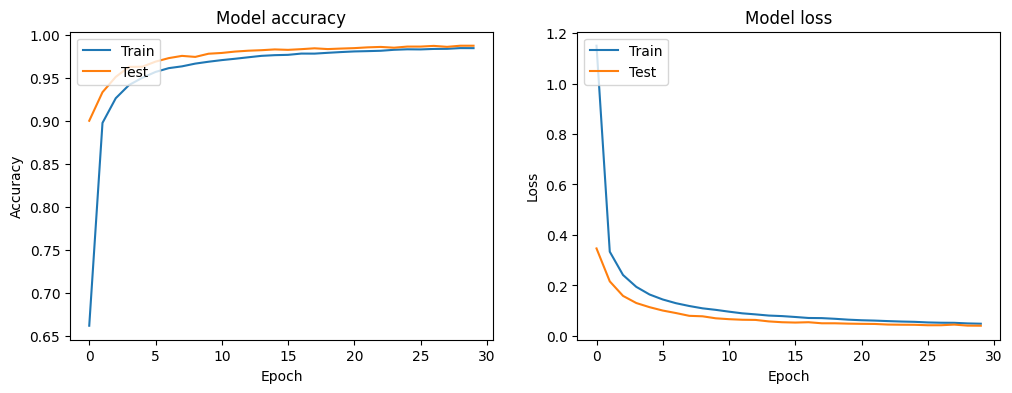

Epoch 1/30
600/600 [==============================] - 9s 15ms/step - loss: 2.2183 - accuracy: 0.3149 - val_loss: 2.0566 - val_accuracy: 0.5315
Epoch 2/30
600/600 [==============================] - 11s 18ms/step - loss: 1.5946 - accuracy: 0.6180 - val_loss: 0.9997 - val_accuracy: 0.7913
Epoch 3/30
600/600 [==============================] - 10s 16ms/step - loss: 0.8229 - accuracy: 0.7700 - val_loss: 0.5620 - val_accuracy: 0.8596
Epoch 4/30
600/600 [==============================] - 9s 15ms/step - loss: 0.5722 - accuracy: 0.8322 - val_loss: 0.4283 - val_accuracy: 0.8869
Epoch 5/30
600/600 [==============================] - 10s 17ms/step - loss: 0.4640 - accuracy: 0.8647 - val_loss: 0.3603 - val_accuracy: 0.9037
Epoch 6/30
600/600 [==============================] - 9s 14ms/step - loss: 0.4059 - accuracy: 0.8795 - val_loss: 0.3220 - val_accuracy: 0.9102
Epoch 7/30
600/600 [==============================] - 10s 17ms/step - loss: 0.3676 - accuracy: 0.8909 - val_loss: 0.2923 - val_accuracy: 0.

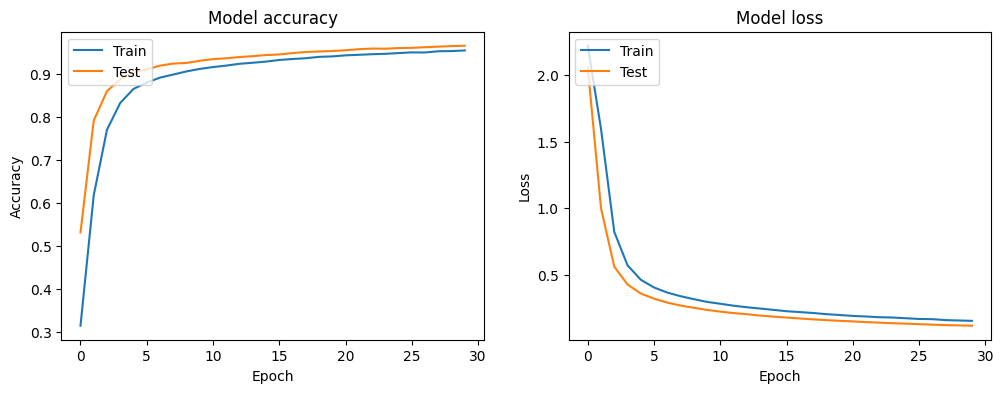

Epoch 1/30
600/600 [==============================] - 11s 17ms/step - loss: 2.2898 - accuracy: 0.1481 - val_loss: 2.2695 - val_accuracy: 0.2145
Epoch 2/30
600/600 [==============================] - 9s 15ms/step - loss: 2.2550 - accuracy: 0.2375 - val_loss: 2.2328 - val_accuracy: 0.3329
Epoch 3/30
600/600 [==============================] - 10s 16ms/step - loss: 2.2169 - accuracy: 0.3353 - val_loss: 2.1923 - val_accuracy: 0.4640
Epoch 4/30
600/600 [==============================] - 10s 16ms/step - loss: 2.1746 - accuracy: 0.4254 - val_loss: 2.1459 - val_accuracy: 0.5712
Epoch 5/30
600/600 [==============================] - 9s 15ms/step - loss: 2.1257 - accuracy: 0.4846 - val_loss: 2.0905 - val_accuracy: 0.6291
Epoch 6/30
600/600 [==============================] - 9s 15ms/step - loss: 2.0677 - accuracy: 0.5297 - val_loss: 2.0250 - val_accuracy: 0.6634
Epoch 7/30
600/600 [==============================] - 9s 14ms/step - loss: 1.9990 - accuracy: 0.5627 - val_loss: 1.9475 - val_accuracy: 0.6

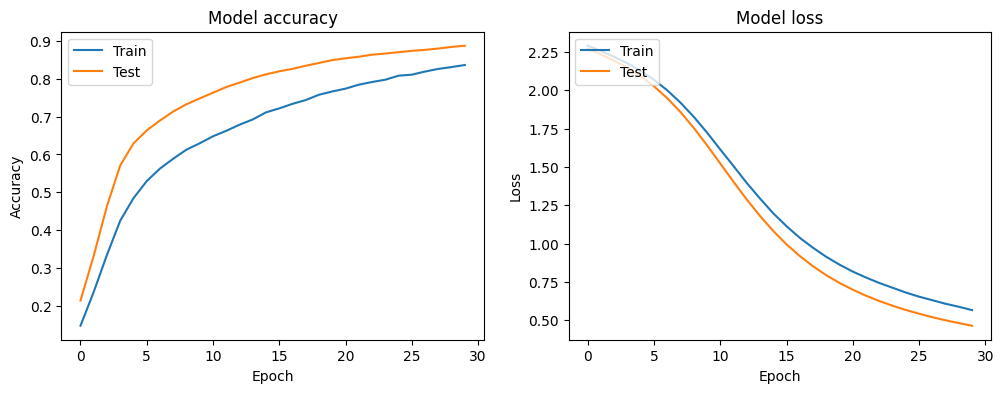

Epoch 1/30
600/600 [==============================] - 9s 13ms/step - loss: 0.2063 - accuracy: 0.9368 - val_loss: 0.0670 - val_accuracy: 0.9787
Epoch 2/30
600/600 [==============================] - 8s 14ms/step - loss: 0.0568 - accuracy: 0.9826 - val_loss: 0.0357 - val_accuracy: 0.9882
Epoch 3/30
600/600 [==============================] - 8s 14ms/step - loss: 0.0397 - accuracy: 0.9879 - val_loss: 0.0275 - val_accuracy: 0.9895
Epoch 4/30
600/600 [==============================] - 8s 14ms/step - loss: 0.0295 - accuracy: 0.9911 - val_loss: 0.0253 - val_accuracy: 0.9914
Epoch 5/30
600/600 [==============================] - 9s 15ms/step - loss: 0.0250 - accuracy: 0.9925 - val_loss: 0.0249 - val_accuracy: 0.9911
Epoch 6/30
600/600 [==============================] - 8s 14ms/step - loss: 0.0193 - accuracy: 0.9938 - val_loss: 0.0240 - val_accuracy: 0.9930
Epoch 7/30
600/600 [==============================] - 9s 14ms/step - loss: 0.0163 - accuracy: 0.9947 - val_loss: 0.0302 - val_accuracy: 0.9914

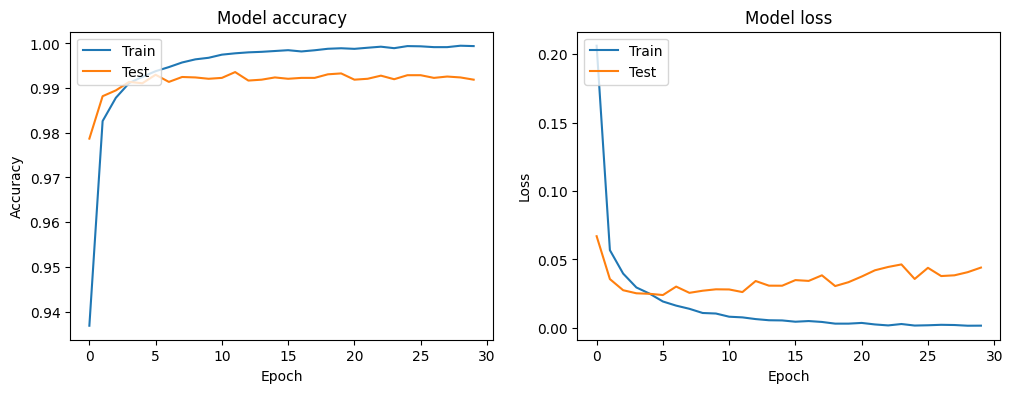

Epoch 1/30
600/600 [==============================] - 9s 14ms/step - loss: 0.2063 - accuracy: 0.9373 - val_loss: 0.0533 - val_accuracy: 0.9833
Epoch 2/30
600/600 [==============================] - 9s 16ms/step - loss: 0.0615 - accuracy: 0.9810 - val_loss: 0.0323 - val_accuracy: 0.9889
Epoch 3/30
600/600 [==============================] - 8s 14ms/step - loss: 0.0433 - accuracy: 0.9866 - val_loss: 0.0308 - val_accuracy: 0.9910
Epoch 4/30
600/600 [==============================] - 10s 17ms/step - loss: 0.0340 - accuracy: 0.9893 - val_loss: 0.0265 - val_accuracy: 0.9918
Epoch 5/30
600/600 [==============================] - 8s 14ms/step - loss: 0.0274 - accuracy: 0.9910 - val_loss: 0.0362 - val_accuracy: 0.9876
Epoch 6/30
600/600 [==============================] - 9s 16ms/step - loss: 0.0219 - accuracy: 0.9929 - val_loss: 0.0292 - val_accuracy: 0.9902
Epoch 7/30
600/600 [==============================] - 8s 14ms/step - loss: 0.0200 - accuracy: 0.9938 - val_loss: 0.0271 - val_accuracy: 0.991

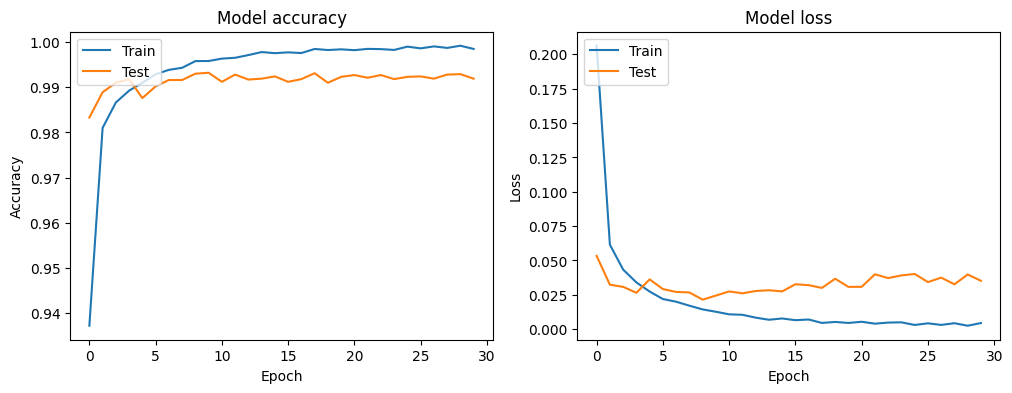

Epoch 1/30
600/600 [==============================] - 10s 15ms/step - loss: 0.2117 - accuracy: 0.9366 - val_loss: 0.0509 - val_accuracy: 0.9833
Epoch 2/30
600/600 [==============================] - 9s 14ms/step - loss: 0.0639 - accuracy: 0.9802 - val_loss: 0.0358 - val_accuracy: 0.9878
Epoch 3/30
600/600 [==============================] - 9s 16ms/step - loss: 0.0475 - accuracy: 0.9855 - val_loss: 0.0329 - val_accuracy: 0.9887
Epoch 4/30
600/600 [==============================] - 8s 14ms/step - loss: 0.0348 - accuracy: 0.9887 - val_loss: 0.0262 - val_accuracy: 0.9902
Epoch 5/30
600/600 [==============================] - 9s 15ms/step - loss: 0.0302 - accuracy: 0.9904 - val_loss: 0.0261 - val_accuracy: 0.9908
Epoch 6/30
600/600 [==============================] - 9s 15ms/step - loss: 0.0243 - accuracy: 0.9922 - val_loss: 0.0335 - val_accuracy: 0.9893
Epoch 7/30
600/600 [==============================] - 10s 16ms/step - loss: 0.0199 - accuracy: 0.9933 - val_loss: 0.0259 - val_accuracy: 0.99

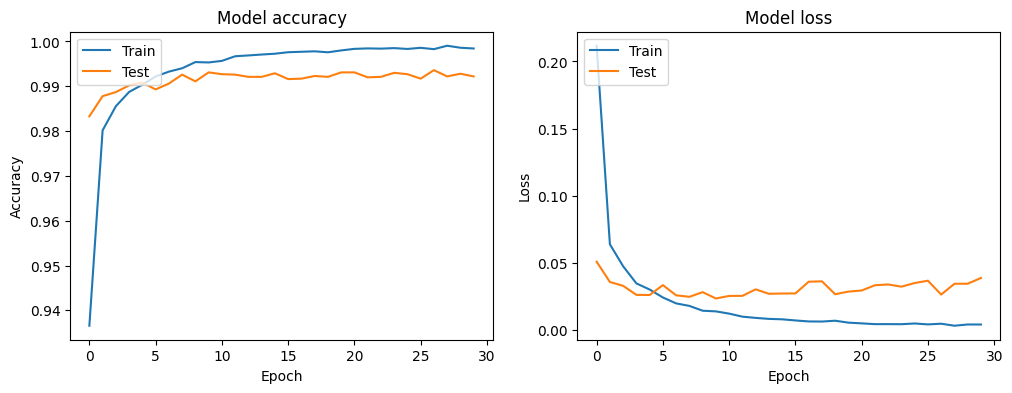

In [16]:
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Define the learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

    
# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=2)


for model_fn, model_name in models_to_train:
    for optimizer in optimizers:
        model = model_fn()
        model.compile(optimizer=optimizer, 
                      loss='sparse_categorical_crossentropy', 
                      metrics=['accuracy'])

        history = model.fit(x_train,
                            y_train, 
                            batch_size=BATCHSIZE,
                            epochs=EPOCHS, 
                            validation_data=(x_test, y_test)
                           )##callbacks=[early_stopping, LearningRateScheduler(scheduler)])
        
        test_loss, test_acc = model.evaluate(x_test, y_test)

        print('\n%s with %s optimizer:' % (model_name, optimizer))
        print(' Test accuracy:', test_acc)
        print(' Test loss:', test_loss)


        # Plot training & validation accuracy values
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('Model accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='upper left')

        # Plot training & validation loss values
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='upper left')

        plt.show()